Nama : Patrick Jonathan

NIM : 2440064791

Link Video : https://binusianorg-my.sharepoint.com/personal/patrick_jonathan001_binus_ac_id/_layouts/15/guestaccess.aspx?docid=02fe207a724d54a4abc5b20544b11b394&authkey=AQKzJTiQ9eKUl0wMHJm0XA4&e=D8AQZA

In [8]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [9]:
! kaggle datasets download sshikamaru/fruit-recognition

 95% 97.0M/102M [00:01<00:00, 120MB/s]
100% 102M/102M [00:01<00:00, 105MB/s] 


In [10]:
! unzip fruit-recognition.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/train/Pepper Green/Pepper Green_264.jpg  
  inflating: train/train/Pepper Green/Pepper Green_265.jpg  
  inflating: train/train/Pepper Green/Pepper Green_266.jpg  
  inflating: train/train/Pepper Green/Pepper Green_267.jpg  
  inflating: train/train/Pepper Green/Pepper Green_268.jpg  
  inflating: train/train/Pepper Green/Pepper Green_269.jpg  
  inflating: train/train/Pepper Green/Pepper Green_27.jpg  
  inflating: train/train/Pepper Green/Pepper Green_270.jpg  
  inflating: train/train/Pepper Green/Pepper Green_271.jpg  
  inflating: train/train/Pepper Green/Pepper Green_272.jpg  
  inflating: train/train/Pepper Green/Pepper Green_273.jpg  
  inflating: train/train/Pepper Green/Pepper Green_274.jpg  
  inflating: train/train/Pepper Green/Pepper Green_275.jpg  
  inflating: train/train/Pepper Green/Pepper Green_276.jpg  
  inflating: train/train/Pepper Green/Pepper Green_277.jpg  
  inflating: train/train/Pepper Gre

Import semua library yang dibutuhkan

In [34]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.models import load_model
import warnings
warnings.filterwarnings("ignore")
import pathlib
import PIL
import matplotlib.pyplot as plt

Masukkan training data ke dalam ImageFolder untuk kita lihat propertiesnya

In [28]:
train_data = datasets.ImageFolder(
    root='./train/train/'
)

In [29]:
print(train_data)

Dataset ImageFolder
    Number of datapoints: 16854
    Root location: ./train/train/


Terdapat 16854 data foto di dalam train_data

In [30]:
print(train_data.classes)

['Apple Braeburn', 'Apple Granny Smith', 'Apricot', 'Avocado', 'Banana', 'Blueberry', 'Cactus fruit', 'Cantaloupe', 'Cherry', 'Clementine', 'Corn', 'Cucumber Ripe', 'Grape Blue', 'Kiwi', 'Lemon', 'Limes', 'Mango', 'Onion White', 'Orange', 'Papaya', 'Passion Fruit', 'Peach', 'Pear', 'Pepper Green', 'Pepper Red', 'Pineapple', 'Plum', 'Pomegranate', 'Potato Red', 'Raspberry', 'Strawberry', 'Tomato', 'Watermelon']


In [31]:
print(train_data.class_to_idx)

{'Apple Braeburn': 0, 'Apple Granny Smith': 1, 'Apricot': 2, 'Avocado': 3, 'Banana': 4, 'Blueberry': 5, 'Cactus fruit': 6, 'Cantaloupe': 7, 'Cherry': 8, 'Clementine': 9, 'Corn': 10, 'Cucumber Ripe': 11, 'Grape Blue': 12, 'Kiwi': 13, 'Lemon': 14, 'Limes': 15, 'Mango': 16, 'Onion White': 17, 'Orange': 18, 'Papaya': 19, 'Passion Fruit': 20, 'Peach': 21, 'Pear': 22, 'Pepper Green': 23, 'Pepper Red': 24, 'Pineapple': 25, 'Plum': 26, 'Pomegranate': 27, 'Potato Red': 28, 'Raspberry': 29, 'Strawberry': 30, 'Tomato': 31, 'Watermelon': 32}


Dapat dilihat bahwa dalam dataset ini terdapat 33 Class

In [32]:
print(type(train_data[0]))
print(len(train_data[0]))
data, label = train_data[0]

<class 'tuple'>
2


In [33]:
print(type(data))
print(data)

<class 'PIL.Image.Image'>
<PIL.Image.Image image mode=RGB size=100x100 at 0x7F93D1A1ED10>


Size dari sebuah image dalam dataset ini adalah 100x100

Selanjutnya kita ubah data image menjadi tensor dengan fungsi rescale pada ImageDataGenerator. Pada parameter rescale saya beri nilai “1./255” yang artinya nanti setiap nilai akan dikali 1/255 sehingga rentangan nilainya akan berubah diantara 0 sampai 1.

Lalu kita split data train menjadi training data dan validation data dengan komposisi 70% train data dan 30% validation data. 

In [12]:
trainimageGen = ImageDataGenerator(
    rescale=1./255, 
    vertical_flip=True,
    horizontal_flip=True,
    validation_split=0.3
)

testimageGen = ImageDataGenerator(rescale=1./255)

Lalu kita masukan ke dalam loader untuk dilakukan data batching yang berguna untuk mempercepat pemrosesan data dengan jumlah yang besar. Pada data ini saya menggunakan ukuran batch 32 sampel dan mengacak dataset pada train_data agar sampel diambil secara random. Lalu saya masukkan juga target size yang sama dengan size foto aslinya yaitu 100x100

In [35]:
train_data = trainimageGen.flow_from_directory(
    './train/train/', 
    shuffle = True,
    subset='training',
    batch_size = 32,
    target_size = (100, 100)
)

val_data = trainimageGen.flow_from_directory(
    './train/train/', 
    shuffle = False,
    subset='validation',
    batch_size = 16,
    target_size = (100, 100)
)

test_data = testimageGen.flow_from_directory(
    './test/',
    shuffle = False,
    batch_size = 16,
    target_size = (100, 100)
)

Found 11810 images belonging to 33 classes.
Found 5044 images belonging to 33 classes.
Found 5641 images belonging to 1 classes.


Selanjutnya saya buat arsitektur atau modelnya dengan menggunakan input shape yang sama dengan size foto aslinya yaitu 100x100 dengan data RGB. Terakhir pada output layer saya masukan output 33 karena terdapat 33 kelas buah-buahan yang perlu dikenali.

Pada model ini saya tidak menggunakan optimizer untuk melihat perbedaan accuracy antara yang sudah menerapkan hyperparameter tuning dengan yang belum.

In [14]:
model = Sequential()

model.add(Conv2D(16, (5, 5), activation='relu', padding='Same', input_shape=(100, 100, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(32, (5, 5), activation='relu', padding='Same'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (5, 5), activation='relu', padding='Same'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(33, activation='softmax'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 16)      1216      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 32)        12832     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 25, 25, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 25, 25, 64)        51264     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 64)       0

Lalu kita training modelnya untuk melihat training loss, training accuracy, validation loss dan validation accuracy 

In [15]:
early = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3, mode='max', restore_best_weights=True)
history = model.fit(
    train_data, 
    validation_data=val_data,
    steps_per_epoch=train_data.n//train_data.batch_size,
    validation_steps=val_data.n//val_data.batch_size,
    callbacks=[early],
    epochs=10
)

Epoch 1/10
369/369 [==============================] - 255s 687ms/step - loss: 0.8419 - accuracy: 0.7485 - val_loss: 0.3670 - val_accuracy: 0.8837
Epoch 2/10
369/369 [==============================] - 252s 682ms/step - loss: 0.1585 - accuracy: 0.9586 - val_loss: 0.0422 - val_accuracy: 0.9863
Epoch 3/10
369/369 [==============================] - 250s 678ms/step - loss: 0.1006 - accuracy: 0.9780 - val_loss: 0.0125 - val_accuracy: 0.9950
Epoch 4/10
369/369 [==============================] - 252s 682ms/step - loss: 0.0818 - accuracy: 0.9845 - val_loss: 0.0099 - val_accuracy: 0.9960
Epoch 5/10
369/369 [==============================] - 251s 682ms/step - loss: 0.0642 - accuracy: 0.9884 - val_loss: 0.0045 - val_accuracy: 0.9984
Epoch 6/10
369/369 [==============================] - 249s 676ms/step - loss: 0.0558 - accuracy: 0.9904 - val_loss: 0.0048 - val_accuracy: 0.9988
Epoch 7/10
369/369 [==============================] - 252s 682ms/step - loss: 0.0862 - accuracy: 0.9880 - val_loss: 0.1174 -

Hasil dari trainingnya menunjukkan angka yang cukup baik dimana dalam setiap epoch nya angka dari loss semakin berkurang dan angka dari accuracy semakin bertambah

Mari kita lihat beberapa sampel dari hasil prediksinya

In [37]:
fruitMap = dict([(v, k) for k, v in train_data.class_indices.items()])
fruitMap

{0: 'Apple Braeburn',
 1: 'Apple Granny Smith',
 2: 'Apricot',
 3: 'Avocado',
 4: 'Banana',
 5: 'Blueberry',
 6: 'Cactus fruit',
 7: 'Cantaloupe',
 8: 'Cherry',
 9: 'Clementine',
 10: 'Corn',
 11: 'Cucumber Ripe',
 12: 'Grape Blue',
 13: 'Kiwi',
 14: 'Lemon',
 15: 'Limes',
 16: 'Mango',
 17: 'Onion White',
 18: 'Orange',
 19: 'Papaya',
 20: 'Passion Fruit',
 21: 'Peach',
 22: 'Pear',
 23: 'Pepper Green',
 24: 'Pepper Red',
 25: 'Pineapple',
 26: 'Plum',
 27: 'Pomegranate',
 28: 'Potato Red',
 29: 'Raspberry',
 30: 'Strawberry',
 31: 'Tomato',
 32: 'Watermelon'}

1/1 [==============================] - 0s 25ms/step
This image most likely belongs to Banana with a 100.00 percent confidence.


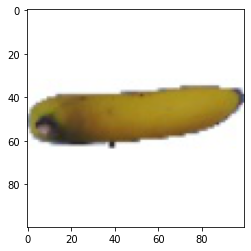

In [26]:
samplePath = pathlib.Path("./test/test/0221.jpg")

image = tf.keras.preprocessing.image.load_img(
    samplePath, target_size=(100, 100)
)

plt.imshow(image)
image = np.array(image)
image = image / 255.0
image = image.reshape(1, 100, 100, 3)
predictions = model.predict(image)
predictions
score = tf.nn.softmax(predictions[0])
print("This image most likely belongs to {} with a {:.2f} percent confidence.".format(fruitMap[np.argmax(score)],100 * np.max(predictions)))

1/1 [==============================] - 0s 42ms/step
This image most likely belongs to Lemon with a 99.86 percent confidence.


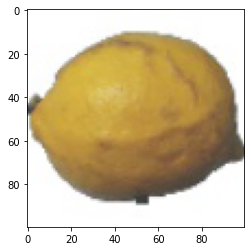

In [79]:
samplePath = pathlib.Path("./test/test/0101.jpg")

image = tf.keras.preprocessing.image.load_img(
    samplePath, target_size=(100, 100)
)

plt.imshow(image)
image = np.array(image)
image = image / 255.0
image = image.reshape(1, 100, 100, 3)
predictions = model.predict(image)
predictions
score = tf.nn.softmax(predictions[0])
print("This image most likely belongs to {} with a {:.2f} percent confidence.".format(fruitMap[np.argmax(score)],100 * np.max(predictions)))

1/1 [==============================] - 0s 41ms/step
This image most likely belongs to Lemon with a 99.68 percent confidence.


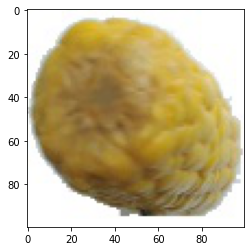

In [80]:
samplePath = pathlib.Path("./test/test/0014.jpg")

image = tf.keras.preprocessing.image.load_img(
    samplePath, target_size=(100, 100)
)

plt.imshow(image)
image = np.array(image)
image = image / 255.0
image = image.reshape(1, 100, 100, 3)
predictions = model.predict(image)
predictions
score = tf.nn.softmax(predictions[0])
print("This image most likely belongs to {} with a {:.2f} percent confidence.".format(fruitMap[np.argmax(score)],100 * np.max(predictions)))

Selanjutnya saya buat satu arsitektur atau model lagi yang sama dengan arsitektur sebelumnya. Namun kali ini saya memodifikasi sedikit dengan menggunakan dropout yang akan mencegah terjadinya overfitting dan juga mempercepat proses learning. Dimana droput sendiri adalah teknik regularisasi jaringan syaraf dimana beberapa neuron akan dipilih secara acak dan tidak dipakai selama pelatihan.

Selain itu, pada model ini saya juga menggunakan optimizer Adam untuk mengoptimasi model yang sudah dibuat atau melakukan hyperparameter tuning.

In [67]:
model1 = Sequential()

model1.add(Conv2D(16, (5, 5), activation='relu', padding='Same', input_shape=(100, 100, 3)))
model1.add(MaxPooling2D((2, 2)))
model1.add(Dropout(0.25))

model1.add(Conv2D(32, (5, 5), activation='relu', padding='Same'))
model1.add(MaxPooling2D((2, 2)))
model1.add(Dropout(0.25))

model1.add(Conv2D(64, (5, 5), activation='relu', padding='Same'))
model1.add(MaxPooling2D((2, 2)))
model1.add(Dropout(0.25))

model1.add(Flatten())
model1.add(Dense(256, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(33, activation='softmax'))

model1.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])
model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 100, 100, 16)      1216      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 50, 50, 16)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 50, 50, 16)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 50, 50, 32)        12832     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 25, 25, 32)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 25, 25, 32)       

In [68]:
early = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3, mode='max', restore_best_weights=True)
history = model1.fit(
    train_data, 
    validation_data=val_data,
    steps_per_epoch=train_data.n//train_data.batch_size,
    validation_steps=val_data.n//val_data.batch_size,
    callbacks=[early],
    epochs=10
)

Epoch 1/10
369/369 [==============================] - 296s 800ms/step - loss: 1.4780 - accuracy: 0.5418 - val_loss: 0.2679 - val_accuracy: 0.9085
Epoch 2/10
369/369 [==============================] - 264s 717ms/step - loss: 0.3745 - accuracy: 0.8710 - val_loss: 0.0879 - val_accuracy: 0.9766
Epoch 3/10
369/369 [==============================] - 275s 746ms/step - loss: 0.2327 - accuracy: 0.9229 - val_loss: 0.0389 - val_accuracy: 0.9889
Epoch 4/10
369/369 [==============================] - 282s 765ms/step - loss: 0.1806 - accuracy: 0.9383 - val_loss: 0.0325 - val_accuracy: 0.9901
Epoch 5/10
369/369 [==============================] - 265s 717ms/step - loss: 0.1377 - accuracy: 0.9557 - val_loss: 0.1030 - val_accuracy: 0.9607
Epoch 6/10
369/369 [==============================] - 265s 718ms/step - loss: 0.1356 - accuracy: 0.9569 - val_loss: 0.0372 - val_accuracy: 0.9885
Epoch 7/10
369/369 [==============================] - 263s 713ms/step - loss: 0.1296 - accuracy: 0.9575 - val_loss: 0.0131 -

Hasil dari trainingnya menunjukkan angka yang sangat baik dimana dalam setiap epoch nya angka dari loss semakin berkurang dan angka dari accuracy semakin bertambah. Jika kita bandingkan dengan model sebelumnya, dapat dilihat bahwa model dengan optimizer menunjukkan performa yang lebih baik dalam hal akurasi dibandingkan dengan model tanpa optimizer. Sehingga optimizer Adam yang dipilih sudah bekerja dengan baik.

Selanjutnya mari kita lihat beberapa sampel hasil prediksi dengan model yang sudah dioptimisasi

1/1 [==============================] - 0s 24ms/step
This image most likely belongs to Banana with a 100.00 percent confidence.


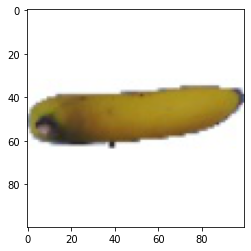

In [76]:
samplePath = pathlib.Path("./test/test/0221.jpg")

image = tf.keras.preprocessing.image.load_img(
    samplePath, target_size=(100, 100)
)

plt.imshow(image)
image = np.array(image)
image = image / 255.0
image = image.reshape(1, 100, 100, 3)
predictions = model1.predict(image)
predictions
score = tf.nn.softmax(predictions[0])
print("This image most likely belongs to {} with a {:.2f} percent confidence.".format(fruitMap[np.argmax(score)],100 * np.max(predictions)))

1/1 [==============================] - 0s 27ms/step
This image most likely belongs to Lemon with a 99.96 percent confidence.


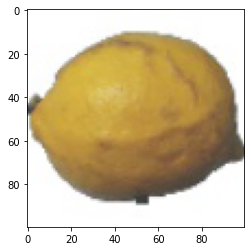

In [78]:
samplePath = pathlib.Path("./test/test/0101.jpg")

image = tf.keras.preprocessing.image.load_img(
    samplePath, target_size=(100, 100)
)

plt.imshow(image)
image = np.array(image)
image = image / 255.0
image = image.reshape(1, 100, 100, 3)
predictions = model1.predict(image)
predictions
score = tf.nn.softmax(predictions[0])
print("This image most likely belongs to {} with a {:.2f} percent confidence.".format(fruitMap[np.argmax(score)],100 * np.max(predictions)))

1/1 [==============================] - 0s 28ms/step
This image most likely belongs to Lemon with a 93.82 percent confidence.


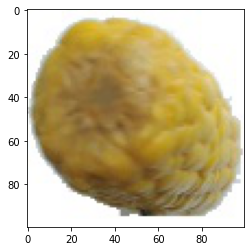

In [77]:
samplePath = pathlib.Path("./test/test/0014.jpg")

image = tf.keras.preprocessing.image.load_img(
    samplePath, target_size=(100, 100)
)

plt.imshow(image)
image = np.array(image)
image = image / 255.0
image = image.reshape(1, 100, 100, 3)
predictions = model1.predict(image)
predictions
score = tf.nn.softmax(predictions[0])
print("This image most likely belongs to {} with a {:.2f} percent confidence.".format(fruitMap[np.argmax(score)],100 * np.max(predictions)))